## BTC/USD Dataset Exploration

##### Short dataset description
Dataset was sourced from : https://www.cryptodatadownload.com/data/bitfinex/. It cointains hourly historical data of the pair BTC/USD. Data are retrieved from Bitfinex (crypto cex). The columns of the data contain :

1) **open** price of the hourly candle
2) **close** price of the hourly candle
3) **low** price (min) of the hourly candle
4) **high** price (max) of the hourly candle
5) **volume** volume during the candle denominated in the respective currency (**btc/usd**)
6) **symbol** --> btc/usd
7) **unix timestamp**
8) **date**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#### Read the data

In [51]:
df = pd.read_csv('Bitfinex_BTCUSD_1h.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.drop(["unix", "symbol"], axis = 1)
df = df.sort_values(by='date')

In [52]:
df.head()

,date,open,high,low,close,Volume USD,Volume BTC
44624,2018-05-15 06:00:00,8723.8,8793.0,8714.9,8739.0,8988053.53,1026.35
44623,2018-05-15 07:00:00,8739.0,8754.8,8719.3,8743.0,2288904.12,261.97
44622,2018-05-15 08:00:00,8743.0,8743.1,8653.2,8723.7,8891773.14,1023.31
44621,2018-05-15 09:00:00,8723.7,8737.8,8701.2,8708.1,2054868.28,235.55
44620,2018-05-15 10:00:00,8708.1,8855.7,8695.8,8784.4,17309722.58,1969.08


#### Check for nulls

In [53]:
df.isnull().sum()

date          0
open          0
high          0
low           0
close         0
Volume USD    0
Volume BTC    0
dtype: int64

#### Basic analysis

In [54]:
print("There are",df.shape[0],"entries in this dataset.")

There are 44625 entries in this dataset.


In [55]:
print("Starting date is :",df['date'].min())
print("Ending date is :",df['date'].max())
print("A total of",(df['date'].max()-df['date'].min()).days, "days is recorded")
print("A total of",(df['date'].max()-df['date'].min()).total_seconds()//3600, "hours is recorded")

Starting date is : 2018-05-15 06:00:00
Ending date is : 2023-06-18 01:00:00
A total of 1859 days is recorded
A total of 44635.0 hours is recorded


In [56]:
print("Lowest btc price recorded is:",df["low"].min(),"usd.")
print("Highest btc price recorded is:",df["high"].max(),"usd.")

Lowest btc price recorded is: 3215.2 usd.
Highest btc price recorded is: 68958.0 usd.


In [57]:
df.describe()

,open,high,low,close,Volume USD,Volume BTC
count,44625.000000,44625.000000,44625.000000,44625.000000,4.462500e+04,44625.000000
mean,21517.026045,21623.485872,21404.623954,21517.429414,6.756771e+06,402.347056
std,16618.322956,16710.215596,16520.569101,16618.265861,1.345978e+07,792.794600
min,3229.800000,3247.100000,3215.200000,3229.800000,0.000000e+00,0.000000
25%,7946.500000,7980.000000,7909.700000,7946.500000,1.002001e+06,73.084834
50%,16584.000000,16617.000000,16547.000000,16585.000000,2.727951e+06,175.717887
75%,33041.000000,33346.000000,32771.000000,33051.427143,7.188632e+06,417.640000
max,68601.000000,68958.000000,68450.000000,68601.000000,4.868595e+08,24104.170000


#### Visualization 

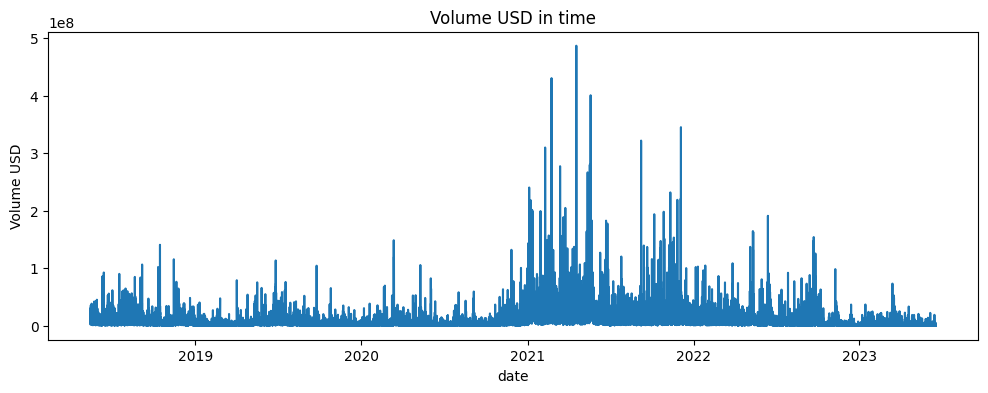

In [58]:
plt.figure(figsize=(12, 4))
plt.plot(df['date'], df['Volume USD'])

# Adding labels and title
plt.xlabel('date')
plt.ylabel('Volume USD')
plt.title('Volume USD in time')

# Displaying the plot
plt.show()

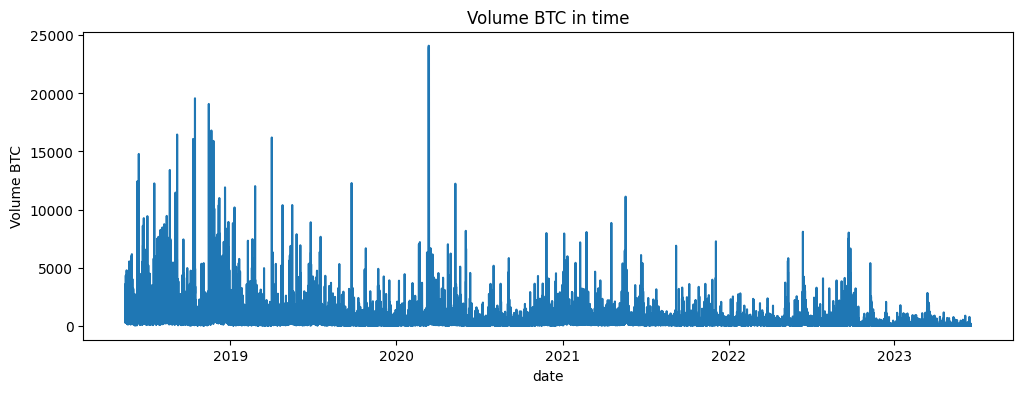

In [59]:
plt.figure(figsize=(12, 4))
plt.plot(df['date'], df['Volume BTC'])

# Adding labels and title
plt.xlabel('date')
plt.ylabel('Volume BTC')
plt.title('Volume BTC in time')

# Displaying the plot
plt.show()

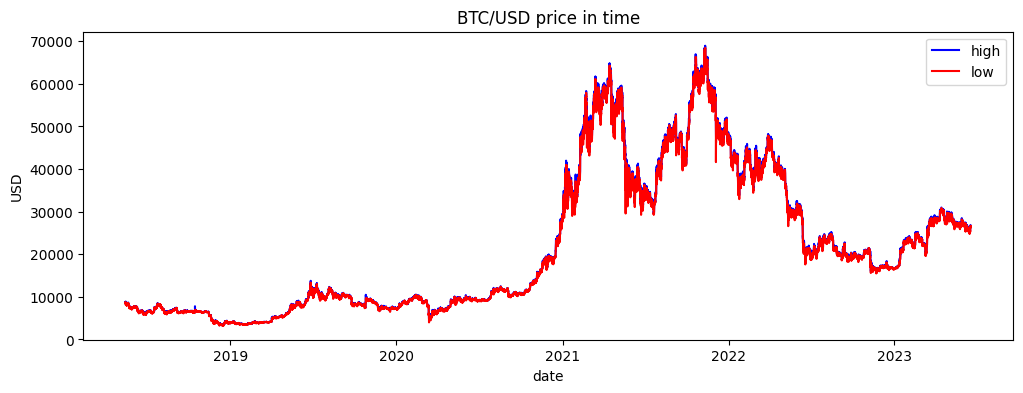

In [60]:
plt.figure(figsize=(12, 4))
plt.plot(df['date'], df['high'], color = 'blue', label = 'high')
plt.plot(df['date'], df['low'], color='red', label = 'low')

# Adding labels and title
plt.xlabel('date')
plt.ylabel('USD')
plt.title('BTC/USD price in time')
plt.legend()

# Displaying the plot
plt.show()

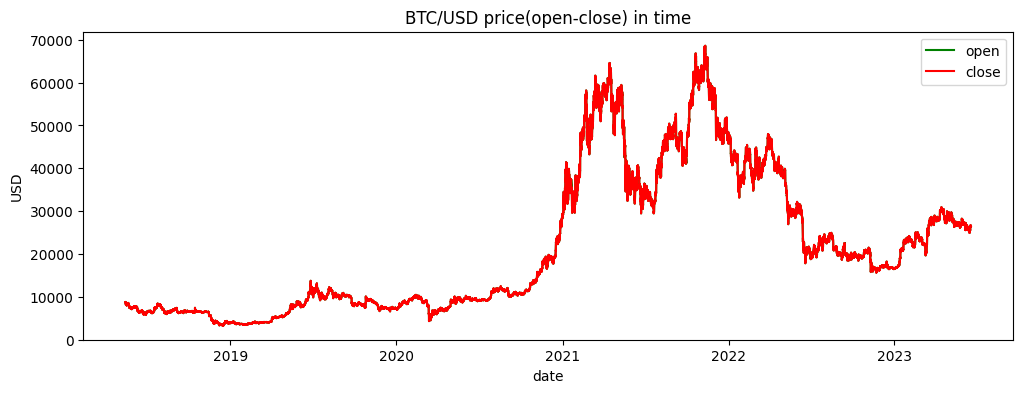

In [61]:
plt.figure(figsize=(12, 4))
plt.plot(df['date'], df['open'], color = 'green', label = 'open')
plt.plot(df['date'], df['close'], color='red', label = 'close')

# Adding labels and title
plt.xlabel('date')
plt.ylabel('USD')
plt.title('BTC/USD price(open-close) in time')
plt.legend()

# Displaying the plot
plt.show()

### Yearly Analysis

In [62]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [63]:
def analyze_per_year(year, data):
    y = data.loc[(data['date'] >= year+'-01-01') & (data['date'] <= year+'-12-31')]
    month = y.groupby(y['date'].dt.strftime('%B'))[['open','close']].mean()
    month = month.reindex(months, axis=0)
    print(month)

    print("\n\n\n")

    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=month.index,
        y=month['open'],
        name='BTC/USD Open Price',
        marker_color='red'
    ))
    fig.add_trace(go.Bar(
        x=month.index,
        y=month['close'],
        name='BTC/USD Close Price',
        marker_color='blue'
    ))

    fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                    title='Monthwise comparision between BTC/USD open and close price')
    fig.show()

    print("\n\n\n")

    plt.figure(figsize=(12, 4))
    plt.plot(y['date'], y['high'], color = 'blue', label = 'high')
    plt.plot(y['date'], y['low'], color='red', label = 'low')

    # Adding labels and title
    plt.xlabel('date')
    plt.ylabel('USD')
    plt.title('BTC/USD price in time for '+year)
    plt.legend()

    # Displaying the plot
    plt.show()

    

#### 2018

                  open        close
date                               
January            NaN          NaN
February           NaN          NaN
March              NaN          NaN
April              NaN          NaN
May        7848.426269  7845.346667
June       6782.502181  6780.977319
July       7099.632769  7101.433575
August     6691.658051  6690.695645
September  6597.669347  6597.124625
October    6543.845632  6543.460000
November   5501.966514  5498.739444
December   3778.107268  3778.004632






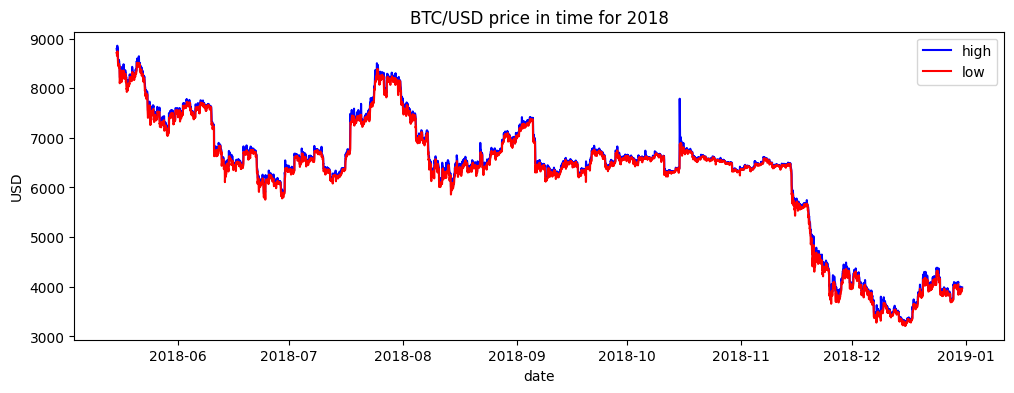

In [64]:
analyze_per_year('2018',df)

#### 2019

                   open         close
date                                 
January     3749.355497   3749.001895
February    3746.731354   3747.296235
March       4010.430054   4010.797661
April       5212.443157   5214.448887
May         7318.065148   7322.007554
June        9368.361958   9371.517972
July       10666.652702  10665.688992
August     10633.866452  10633.242661
September   9812.140181   9810.344681
October     8388.872460   8390.020927
November    8376.118472   8373.916083
December    7279.462968   7278.991429






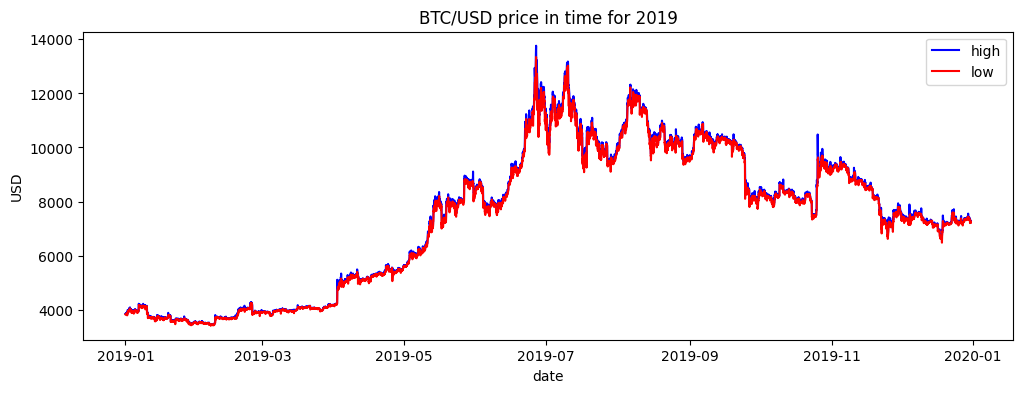

In [65]:
analyze_per_year('2019',df)

#### 2020

                   open         close
date                                 
January     8329.681546   8332.583562
February    9650.240618   9649.082500
March       6945.921210   6943.060161
April       7181.471000   7184.531139
May         9232.216344   9233.317661
June        9468.434042   9467.864736
July        9556.530269   9559.486384
August     11638.461452  11638.892903
September  10675.567181  10674.350514
October    11841.543602  11845.634288
November   16517.434501  16525.477740
December   21578.474044  21591.517586






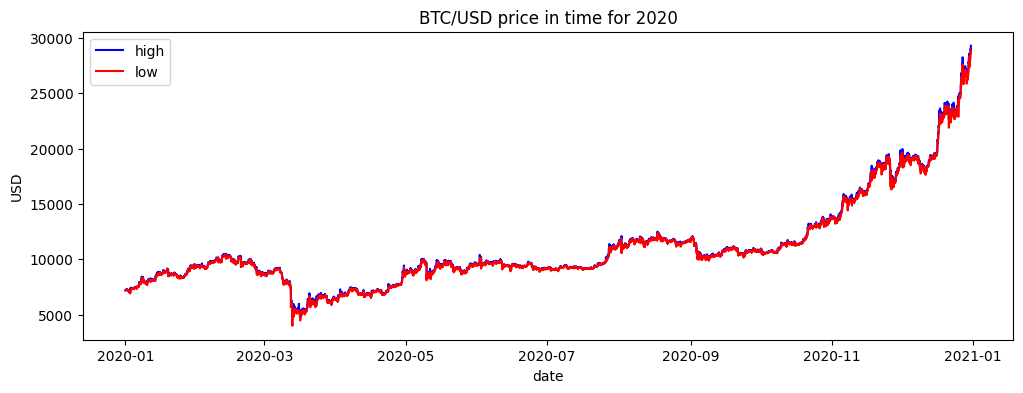

In [66]:
analyze_per_year('2020',df)

#### 2021

                   open         close
date                                 
January    34557.516879  34562.786836
February   46045.344875  46064.358364
March      54638.834523  54657.185326
April      57107.373687  57105.509069
May        46980.583919  46953.013877
June       35791.115113  35788.266241
July       34232.085415  34241.119239
August     45547.653817  45555.788902
September  46066.109847  46061.499151
October    57656.851011  57680.627676
November   60670.317810  60664.822227
December   49559.774790  49546.120880






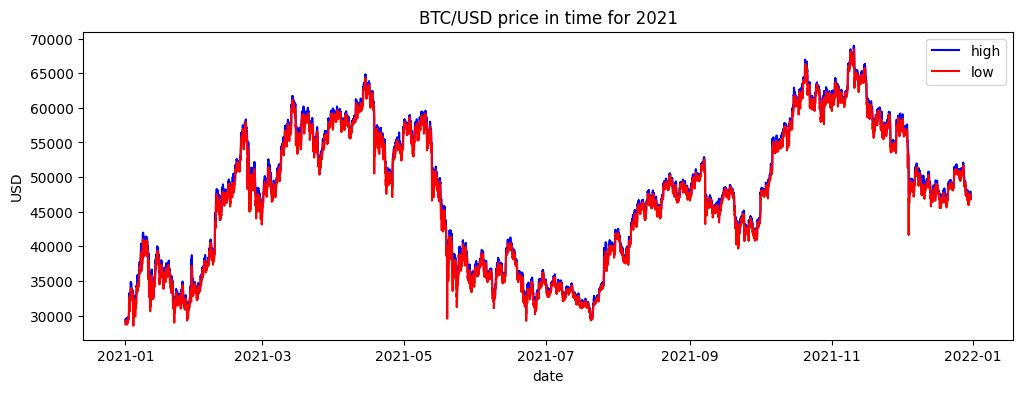

In [67]:
analyze_per_year('2021',df)

#### 2022

                   open         close
date                                 
January    41167.125842  41156.869712
February   40622.961271  40629.477119
March      41939.963890  41942.987247
April      41640.597579  41629.642952
May        31881.290032  31873.346282
June       24491.308253  24474.803366
July       21433.172950  21437.906772
August     22472.601054  22468.524657
September  19823.602798  19822.729122
October    19635.679832  19637.019730
November   17695.766667  17691.095833
December   16977.614424  16976.854369






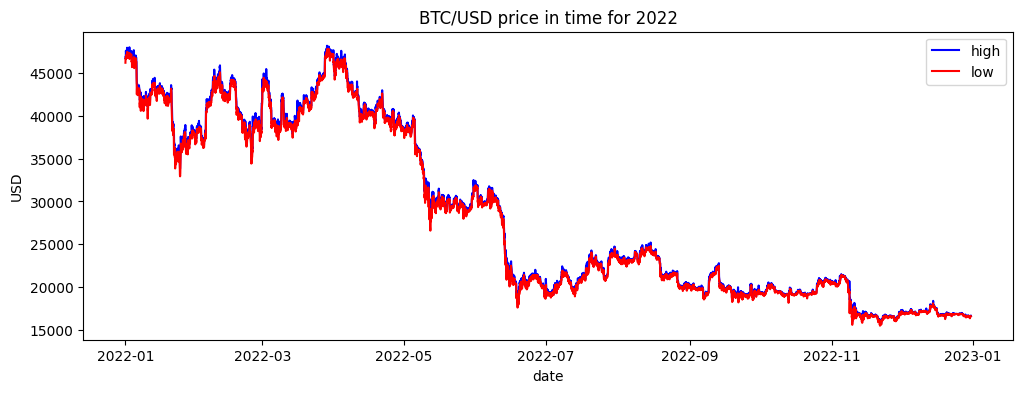

In [68]:
analyze_per_year('2022',df)

#### 2023

                   open         close
date                                 
January    20122.908602  20131.594086
February   23299.669643  23299.586310
March      25028.150943  25035.277628
April      28833.750000  28834.241667
May        27507.762097  27504.471774
June       26328.431707  26326.626829
July                NaN           NaN
August              NaN           NaN
September           NaN           NaN
October             NaN           NaN
November            NaN           NaN
December            NaN           NaN






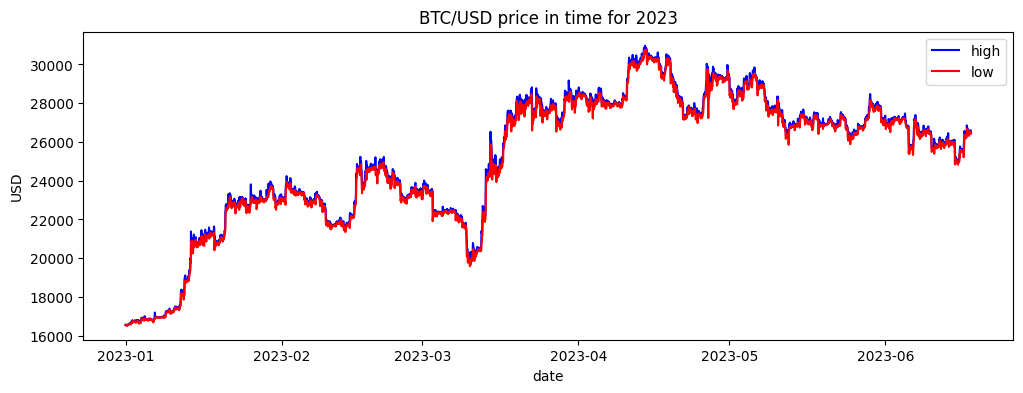

In [69]:
analyze_per_year('2023',df)